In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

Load the file regdataex.csv

In [2]:
df = pd.read_csv("regdataex.csv")

Use head, info and describe 

In [3]:
df.head()

,A,B,C,D,E,F,G,H,I,Target
0,20,39,-8,89,103,10,320,C,21,2637
1,46,39,6,45,102,10,109,B,17,4265
2,62,12,3,12,146,26,384,D,16,5906
3,33,45,-1,89,103,36,444,A,7,3326
4,29,28,-72,12,126,23,117,D,2,703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       500 non-null    int64 
 1   B       500 non-null    int64 
 2   C       500 non-null    int64 
 3   D       500 non-null    int64 
 4   E       500 non-null    int64 
 5   F       500 non-null    int64 
 6   G       500 non-null    int64 
 7   H       500 non-null    object
 8   I       500 non-null    int64 
 9   Target  500 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,500.0,39.920,15.694273,14.0,26.00,40.0,54.00,67.0
B,500.0,28.280,10.397780,10.0,19.00,28.0,38.00,45.0
C,500.0,-38.952,34.834416,-100.0,-68.00,-39.5,-7.75,20.0
D,500.0,372.830,1645.237636,-2000.0,20.00,65.0,99.00,6800.0
E,500.0,146.634,28.975908,100.0,121.00,145.0,169.00,200.0
F,500.0,20.200,11.878307,0.0,10.00,20.0,30.00,40.0
G,500.0,224.966,135.069598,-20.0,111.75,225.0,338.75,450.0
I,500.0,11.020,6.771951,0.0,5.00,11.0,17.00,22.0
Target,500.0,3040.658,1778.948155,-1221.0,1604.75,2980.5,4398.75,7107.0


Create a pair plot

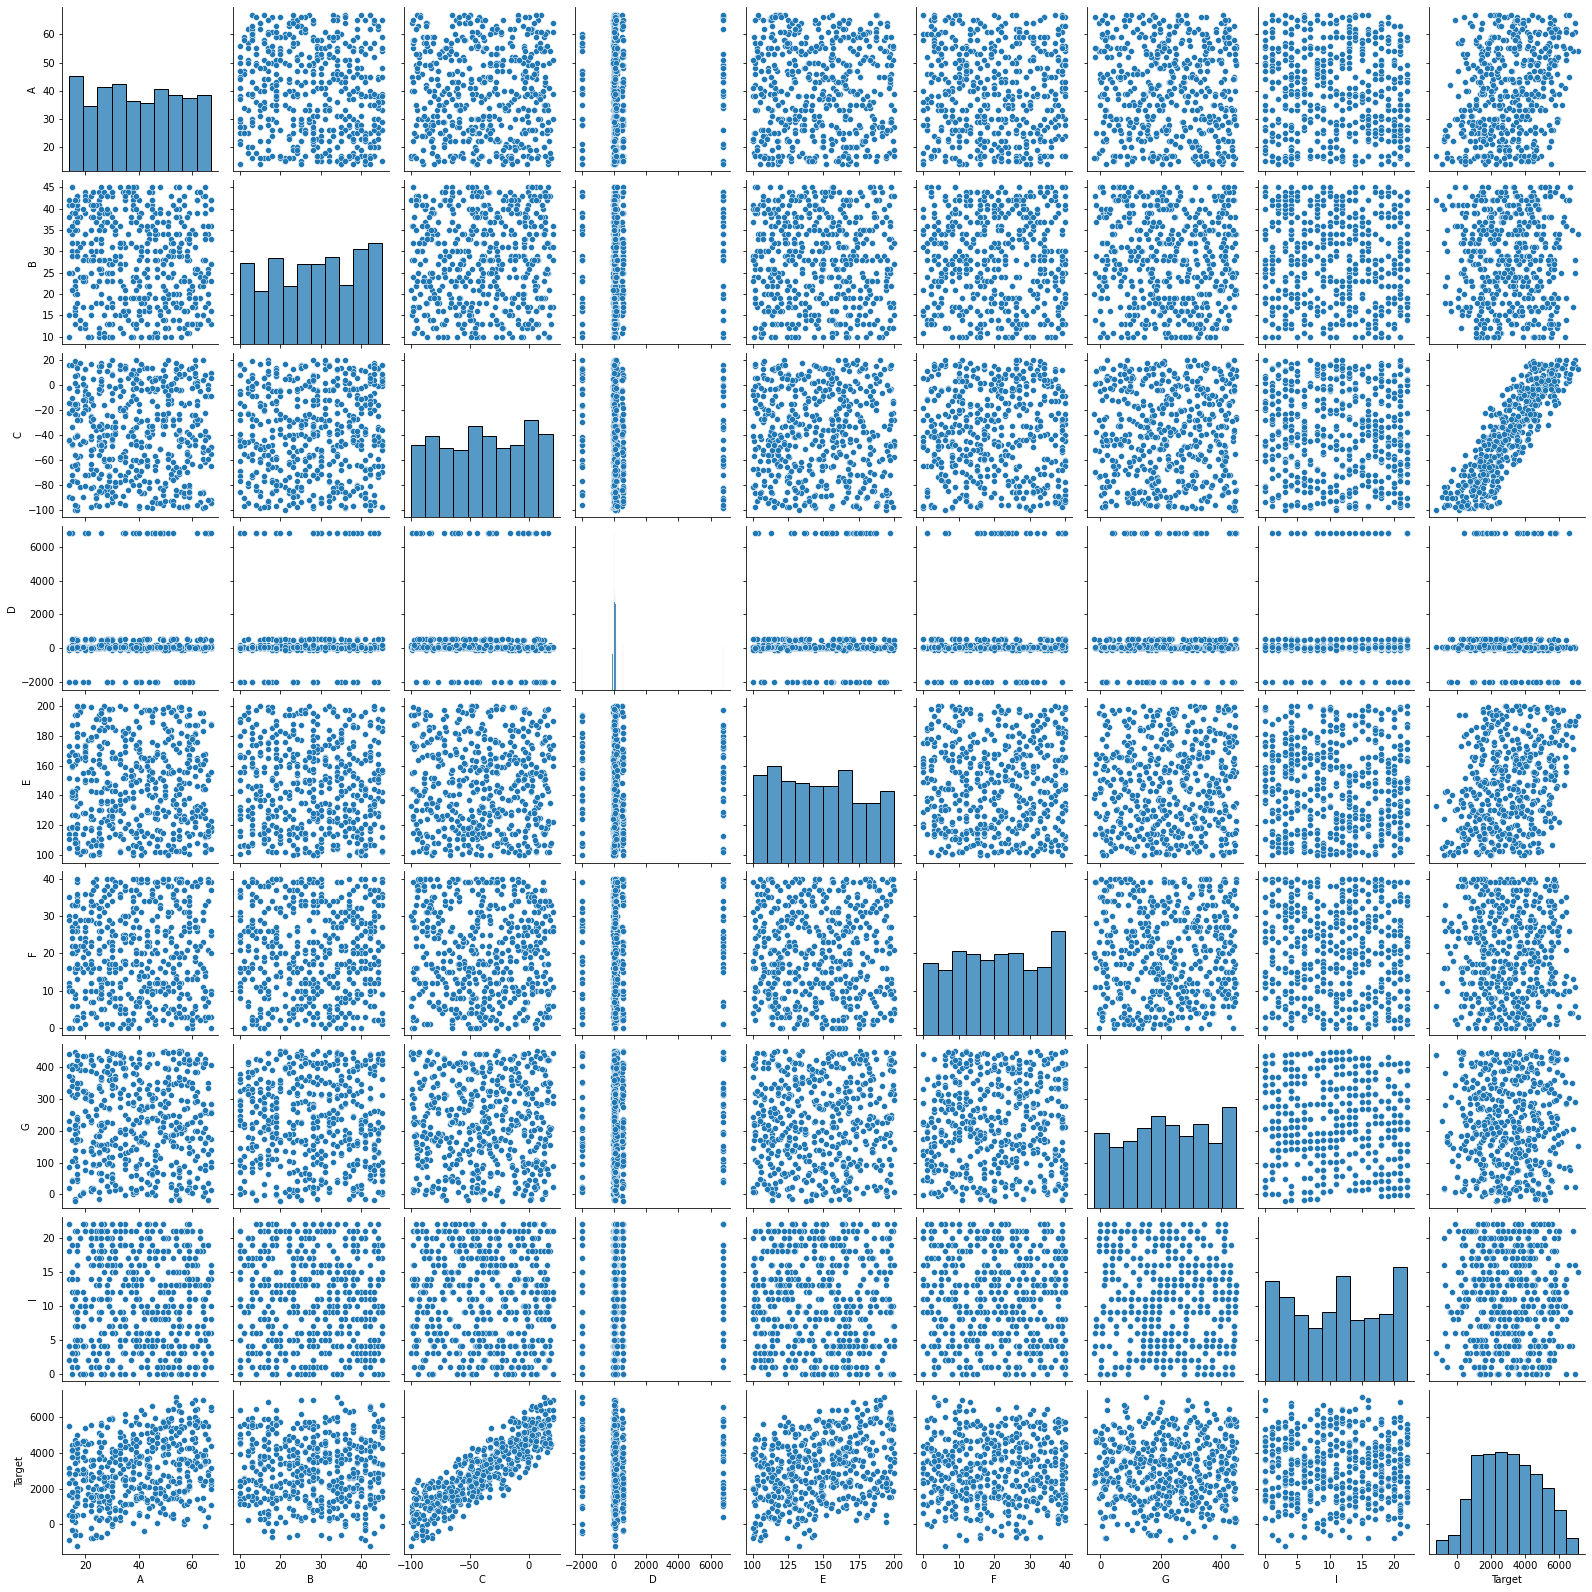

In [7]:
sb.pairplot(df)

Create a Linear Regression model:<br>
* split train and test
* check the results

In [10]:
import sklearn.linear_model as sl
import sklearn.model_selection as sm

In [11]:
df.head(2)

,A,B,C,D,E,F,G,H,I,Target
0,20,39,-8,89,103,10,320,C,21,2637
1,46,39,6,45,102,10,109,B,17,4265


In [12]:
X_train, X_test, y_train, y_test = sm.train_test_split(
    df.drop(['Target', 'H'], axis=1), 
    df.Target, 
    test_size=0.33, 
    random_state=101)

In [13]:
X_train.head(2)

,A,B,C,D,E,F,G,I
176,55,38,-37,89,113,17,248,18
195,66,26,-59,20,150,34,128,13


In [14]:
model = sl.LinearRegression()


In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([ 3.44407489e+01, -1.92623180e+00,  4.46444172e+01,  1.33837310e-03,
        1.97675234e+01, -8.34870734e-01,  9.02150139e-02,  2.60544854e+00])

In [17]:
model.intercept_

523.4192868464338

In [18]:
from sklearn import metrics

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))

276.88783914909607

In [21]:
model.score(X_test, y_test)

0.9766959684247567

In [ ]:
######################################
# PART B

Try to reduce the dimensionality check the model with:<br>
* ['A', 'B', 'E', 'F', 'G', 'I']
* ['A', 'C', 'D', 'F', 'G', 'I']
* ['A', 'E', 'F', 'G', 'I']
* ['B', 'E', 'F']


In [29]:
X_train, X_test, y_train, y_test = sm.train_test_split(
    df[['B', 'E', 'F']], 
    df.Target, 
    test_size=0.33, 
    random_state=101)

In [30]:
model = sl.LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.04931959900373517

In [ ]:
#############################
# PART C

Use itertools.combination to find the minimum set of features to get a score > 0.95<br>
hint for using itertools:

In [ ]:
#############
# try to find all combination of vars to have train score > 0.95 (print it when > 0.95)

In [31]:
import itertools

In [32]:
l = itertools.combinations([1,2,3,4],3)
for i in l:
    print(i)

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [33]:
[print(x) for x in itertools.combinations('ABCD',2)]

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


[None, None, None, None, None, None]

In [34]:
len(df.columns)

10

In [40]:
for i in range(1,9):
    c = itertools.combinations('ABCDEFGI',i)
    for item in c:
#         print(item)
#         print(list(item))
        X_train, X_test, y_train, y_test = sm.train_test_split(
                df[list(item)], 
                df.Target, 
                test_size=0.33, 
                random_state=101)
        model = sl.LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > 0.95:
            print(list(item), score)

['A', 'C', 'E'] 0.976618109183787
['A', 'B', 'C', 'E'] 0.9767778382189206
['A', 'C', 'D', 'E'] 0.9766182074295001
['A', 'C', 'E', 'F'] 0.97647660002007
['A', 'C', 'E', 'G'] 0.9765680040809619
['A', 'C', 'E', 'I'] 0.9767709844294519
['A', 'B', 'C', 'D', 'E'] 0.9767787020825072
['A', 'B', 'C', 'E', 'F'] 0.9766191062036725
['A', 'B', 'C', 'E', 'G'] 0.9767104610896946
['A', 'B', 'C', 'E', 'I'] 0.9769138183001518
['A', 'C', 'D', 'E', 'F'] 0.9764754631801837
['A', 'C', 'D', 'E', 'G'] 0.9765686769452984
['A', 'C', 'D', 'E', 'I'] 0.9767714581922881
['A', 'C', 'E', 'F', 'G'] 0.9764277255418515
['A', 'C', 'E', 'F', 'I'] 0.9766433059156397
['A', 'C', 'E', 'G', 'I'] 0.9767136345061034
['A', 'B', 'C', 'D', 'E', 'F'] 0.9766177934767017
['A', 'B', 'C', 'D', 'E', 'G'] 0.9767121621328042
['A', 'B', 'C', 'D', 'E', 'I'] 0.9769160628050271
['A', 'B', 'C', 'E', 'F', 'G'] 0.9765526365591527
['A', 'B', 'C', 'E', 'F', 'I'] 0.9767694039007344
['A', 'B', 'C', 'E', 'G', 'I'] 0.9768358101313805
['A', 'C', 'D', 'E